# **Visualizing Learning Performance**

In [45]:
MEASUREMENT_CASE = "baseline"

In [45]:
MEASUREMENT_FILE = "../../results/"+MEASUREMENT_CASE+"/performance.csv"
"../../results/baseline/performance.csv"

PLOT_SAVE_PATH = "../../doc/"+MEASUREMENT_CASE+"/"

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if not(os.path.isdir(PLOT_SAVE_PATH)):
    os.mkdir(PLOT_SAVE_PATH)

In [26]:
perf_data = pd.read_csv(MEASUREMENT_FILE)

In [29]:
x = perf_data[perf_data["metric"] == "test_loss"]["epoch"]

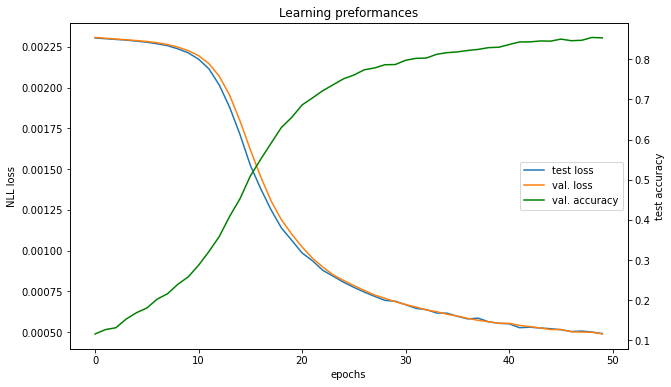

In [47]:
fig, ax = plt.subplots(figsize=[10,6])

twin1 = ax.twinx()

p1, = ax.plot(x, perf_data[perf_data["metric"] == "test_loss"]["value"], label="test loss")
p2, = ax.plot(x, perf_data[perf_data["metric"] == "train_loss"]["value"], label="val. loss")
ax.set_ylabel("NLL loss")

p3, = twin1.plot(x, perf_data[perf_data["metric"] == "test_accuracy"]["value"], color="green", label="val. accuracy")
twin1.set_ylabel("test accuracy")

ax.set_xlabel("epochs")
ax.set_title("Learning preformances")
ax.legend(handles=[p1, p2, p3], loc="center right")

plt.savefig(PLOT_SAVE_PATH+"performance.png")